# Malaria in Africa

### 1. Cleaning the dataset

In [2]:
# Ssemwogerere Trevor Simon 21/U/13093/PS

#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
from fancyimpute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [3]:
# Load the data percentage of missing values and number of blanks
df = pd.read_csv("MalariaAfricaDataset.csv")

total_rows = df.shape[0]
missing_percentages = df.isnull().sum() / total_rows * 100
number_of_blanks = df.isnull().sum()

print("Percentage of missing values:")
print(missing_percentages)

print("\nNumber of blanks:")
print(number_of_blanks)


Percentage of missing values:
Country Name                                                                                0.000000
Year                                                                                        0.000000
Country Code                                                                                0.000000
Incidence of malaria (per 1,000 population at risk)                                         7.407407
Malaria cases reported                                                                      7.407407
Use of insecticide-treated bed nets (% of under-5 population)                              77.777778
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    79.461279
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      82.154882
People using safely managed drinking water services (% of population)                      83.333333
People using safely managed drinking water services, rural (%

c:\Users\Blessing\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



Normalized DataFrame:


,Incidence of malaria,Malaria cases reported,insecticide-treated bed nets,Children with fever receiving antimalarial drugs,IPT,drinking water services,drinking water services rural,drinking water services urban,managed sanitation services,sanitation services rural,...,Rural population,Rural population growth,Urban population,urban population growth,basic drinking water services,basic drinking water services rural,basic drinking water services urban,basic sanitation services,basic sanitation services rural,basic sanitation services urban
0,0.257181,0.314625,0.460139,0.125561,0.130626,0.504190,0.691103,0.397377,0.195796,0.257073,...,0.298660,0.270398,0.701340,0.610788,0.884501,0.830877,0.892716,0.851068,0.648694,0.909823
1,0.620909,0.377105,0.179894,0.498011,0.025168,0.387612,0.348099,0.332750,0.303195,0.175205,...,0.397624,0.508539,0.602376,0.801660,0.267945,0.081179,0.288458,0.339648,0.104673,0.488334
2,0.866414,0.314624,0.412996,0.730678,0.316283,0.224012,0.087434,0.347019,0.341216,0.344055,...,0.599343,0.516129,0.400657,0.725311,0.491045,0.457478,0.505740,0.071677,0.020744,0.114092
3,0.258475,0.314640,0.285913,0.166698,0.190906,0.811954,0.691595,0.678859,0.380676,0.239155,...,0.392442,0.190702,0.607558,0.784232,0.704132,0.489853,0.883740,0.595832,0.329317,0.755016
4,0.896302,0.316427,0.363303,0.677533,0.232870,0.172261,0.139209,0.315405,0.282623,0.216509,...,0.833923,0.532258,0.166077,0.876349,0.328727,0.339212,0.503861,0.111672,0.038809,0.395590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.610100,0.386155,0.726984,0.511866,0.699664,0.343201,0.113573,0.512146,0.316964,0.288618,...,0.604398,0.477230,0.395602,0.700415,0.510083,0.378594,0.773325,0.117251,0.047626,0.187004
590,0.177941,0.019156,0.181025,0.025846,0.084790,1.000000,0.316281,1.000000,1.000000,1.000000,...,0.257078,0.346300,0.742922,0.516183,0.948949,0.865668,0.995408,0.904431,0.686812,0.964886
591,0.684391,0.790029,0.707984,0.799068,0.430617,0.115030,0.085068,0.276055,0.325954,0.301782,...,0.831395,0.612903,0.168605,0.904564,0.284022,0.292341,0.482154,0.141880,0.123429,0.157839
592,0.460212,0.538951,0.512294,0.524498,0.325952,0.457913,0.315440,0.456332,0.298576,0.279951,...,0.581395,0.518027,0.418605,0.735270,0.437174,0.300797,0.664788,0.225029,0.147285,0.276015


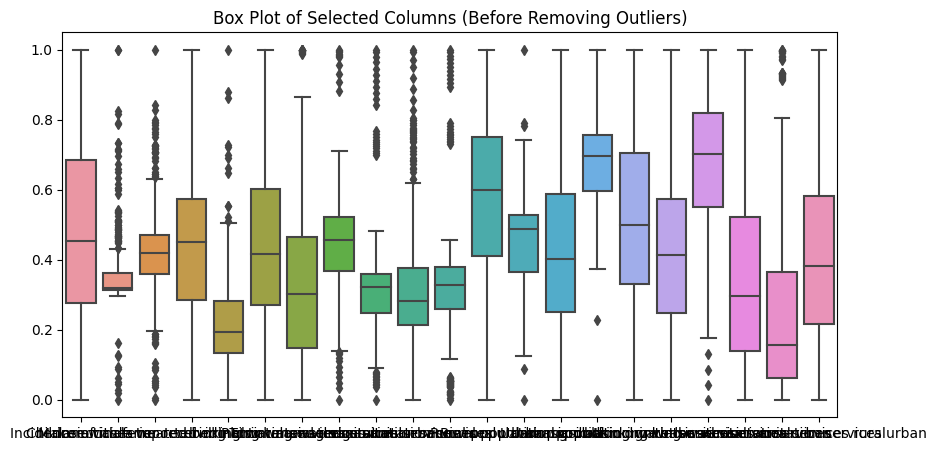

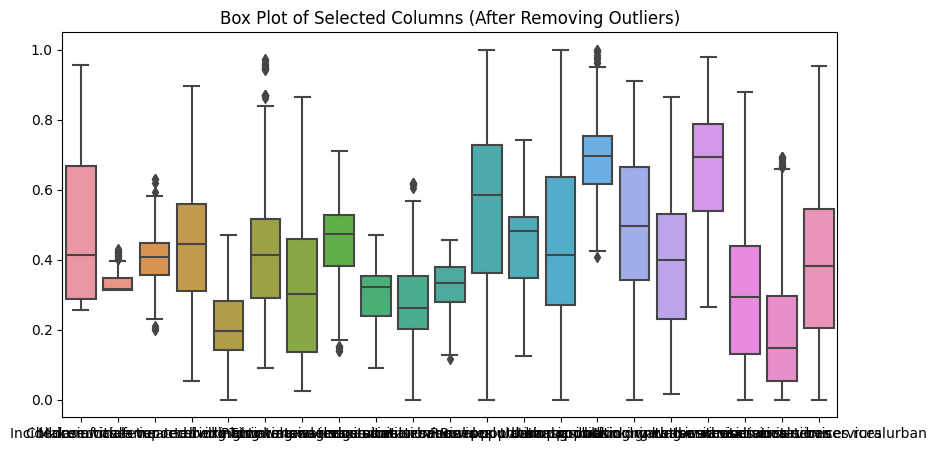

In [4]:
df = pd.read_csv("MalariaAfricaDataset.csv")
# Extract columns of interest with high percentages of missing data
columns_of_interest = ["Use of insecticide-treated bed nets (% of under-5 population)",
                       "Children with fever receiving antimalarial drugs (% of children under age 5 with fever)",
                       "Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)",
                       "People using safely managed drinking water services (% of population)",
                       "People using safely managed drinking water services, rural (% of rural population)",
                       "People using safely managed drinking water services, urban (% of urban population)",
                       "People using safely managed sanitation services (% of population)",
                       "People using safely managed sanitation services, rural (% of rural population)",
                       "People using safely managed sanitation services, urban  (% of urban population)"]

# Prepare the data for multiple imputation (exclude non-numeric columns)
numeric_values = df.drop(["Country Name", "Year", "Country Code", "geometry"], axis=1)

# Perform multiple imputation using IterativeImputer
imputer = IterativeImputer()
imputed_values = imputer.fit_transform(numeric_values)

# Convert the imputed array back to a DataFrame
df_imputed = pd.DataFrame(imputed_values, columns=numeric_values.columns)

# Merge the imputed numeric values with the non-numeric columns
non_numeric = df[["Country Name", "Year", "Country Code", "geometry", "latitude", "longitude"]]
df_combined = pd.concat([non_numeric, df_imputed], axis=1)


# Normalize the selected columns using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_combined.drop(["Country Name", "Year", "Country Code", "geometry", "latitude", "longitude"], axis=1))

# Convert the normalized_data array back to a DataFrame with column names
normalized_df = pd.DataFrame(normalized_data, columns=["Incidence of malaria","Malaria cases reported","insecticide-treated bed nets","Children with fever receiving antimalarial drugs","IPT","drinking water services","drinking water services rural","drinking water services urban","managed sanitation services","sanitation services rural","sanitation services urban","Rural population","Rural population growth","Urban population","urban population growth","basic drinking water services","basic drinking water services rural","basic drinking water services urban","basic sanitation services","basic sanitation services rural","basic sanitation services urban"])

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
display(normalized_df)

# Create a box plot to identify outliers using IQR method
plt.figure(figsize=(10, 5))
sns.boxplot(data=normalized_df)
plt.title('Box Plot of Selected Columns (Before Removing Outliers)')
plt.show()

# Remove outliers using IQR (Interquartile Range) method
Q1 = normalized_df.quantile(0.25)
Q3 = normalized_df.quantile(0.75)
IQR = Q3 - Q1
outliers_removed = normalized_df[~((normalized_df < (Q1 - 1.5 * IQR)) | (normalized_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df = pd.concat([non_numeric, normalized_df], axis=1)

# Create a box plot after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=outliers_removed)
plt.title('Box Plot of Selected Columns (After Removing Outliers)')
plt.show()


### Study the countries with the highest number of malaria cases per annum.

In [ ]:
## Ssali Benjamin Tamale 21/U/13703/EVE

# Group the data by country and calculate the average incidence of malaria cases
average_incidence_by_country = df.groupby("Year")
for name, group in average_incidence_by_country:
    # Visualize the top countries with the highest average incidence and their corresponding number of malaria cases
    plt.figure(figsize=(12, 6))
    plt.bar(group["Country Name"], group["Malaria cases reported"], color='blue', label='Malaria Cases reported')
    plt.xlabel('Country Name')
    plt.ylabel('Malaria Cases reported')
    plt.title(f'Malaria Cases in countries in {name}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


As years increase, Congo, Dem. Republic has the highest increasing malaria cases while Tunisia has reducing malaria cases

In [ ]:
# Group the data by country and calculate the average incidence of malaria cases
average_incidence_by_country = df.groupby("Country Name")
for name, group in average_incidence_by_country:
    # Visualize the top countries with the highest average incidence and their corresponding number of malaria cases
    plt.figure(figsize=(12, 6))
    plt.plot(group["Year"].values, group["Malaria cases reported"].values, color='blue', label='Malaria Cases reported')
    plt.xlabel('Years')
    plt.ylabel('Malaria cases reported')
    plt.title(f'Malaria Cases reported in {name}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
# Get the latitude and longitude for each country
country_coordinates = df
country_coordinates = country_coordinates.drop_duplicates("Country Name")

# Create the map
map_center = [country_coordinates["latitude"].mean(), country_coordinates["longitude"].mean()]
malaria_map = folium.Map(location=map_center, zoom_start=3)

# Add markers for each country
for index, row in country_coordinates.iterrows():
    country_name = row["Country Name"]
    latitude = row["latitude"]
    longitude = row["longitude"]

    popup_text = f"{country_name}<br>Average Incidence:"
    folium.Marker(location=[latitude, longitude], popup=popup_text).add_to(malaria_map)

# Display the map
malaria_map

### How using safely managed drinking water affects the number of malaria cases reported per Year.

In [ ]:
# Group the data by country and calculate the average incidence of malaria cases
average_incidence_by_country = df.groupby("Year")

for name, group in average_incidence_by_country:
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    x = np.arange(len(group["Country Name"].values))
    w =0.4
    ax.bar(x-w, group["Malaria cases reported"], width=w, color='b', label='Malaria cases reported', align='center')
    ax.bar(x, group["drinking water services"], width=w, color='r', label='Drinking water services',align='center')
    ax.set_xticks(np.arange(len(group["Country Name"].values)))
    ax.set_xticklabels(list(group["Country Name"].values))
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.title(f"A bar chart showing malaria reported cases and drinking water services in the {name}.")
    plt.show()
 


# Heat map to show the correlation between 

In [ ]:
# Group the data by country and calculate the average incidence of malaria cases
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.scatter(df["drinking water services"].values,df["Malaria cases reported"].values, color='b', label='Malaria cases reported')
plt.legend()
plt.title(f"A line graph showing malaria reported cases and drinking water services")
plt.xlabel("drinking water services")
plt.ylabel("Malaria cases reported")
plt.show()

In [ ]:
# Heat map describing the correlation
sns.heatmap(df[["Malaria cases reported", "drinking water services"]])

In [ ]:
df[["Malaria cases reported", "drinking water services"]].corr()

### Conclusion
There is no correlation between ther drinking water services and the cases of malaria reported in the country.

# AHWERA SHIFRAH 21/U/14848/EVE

how using safely managed sanitation services affects incidence of malaria(per 1,000 population at risk)

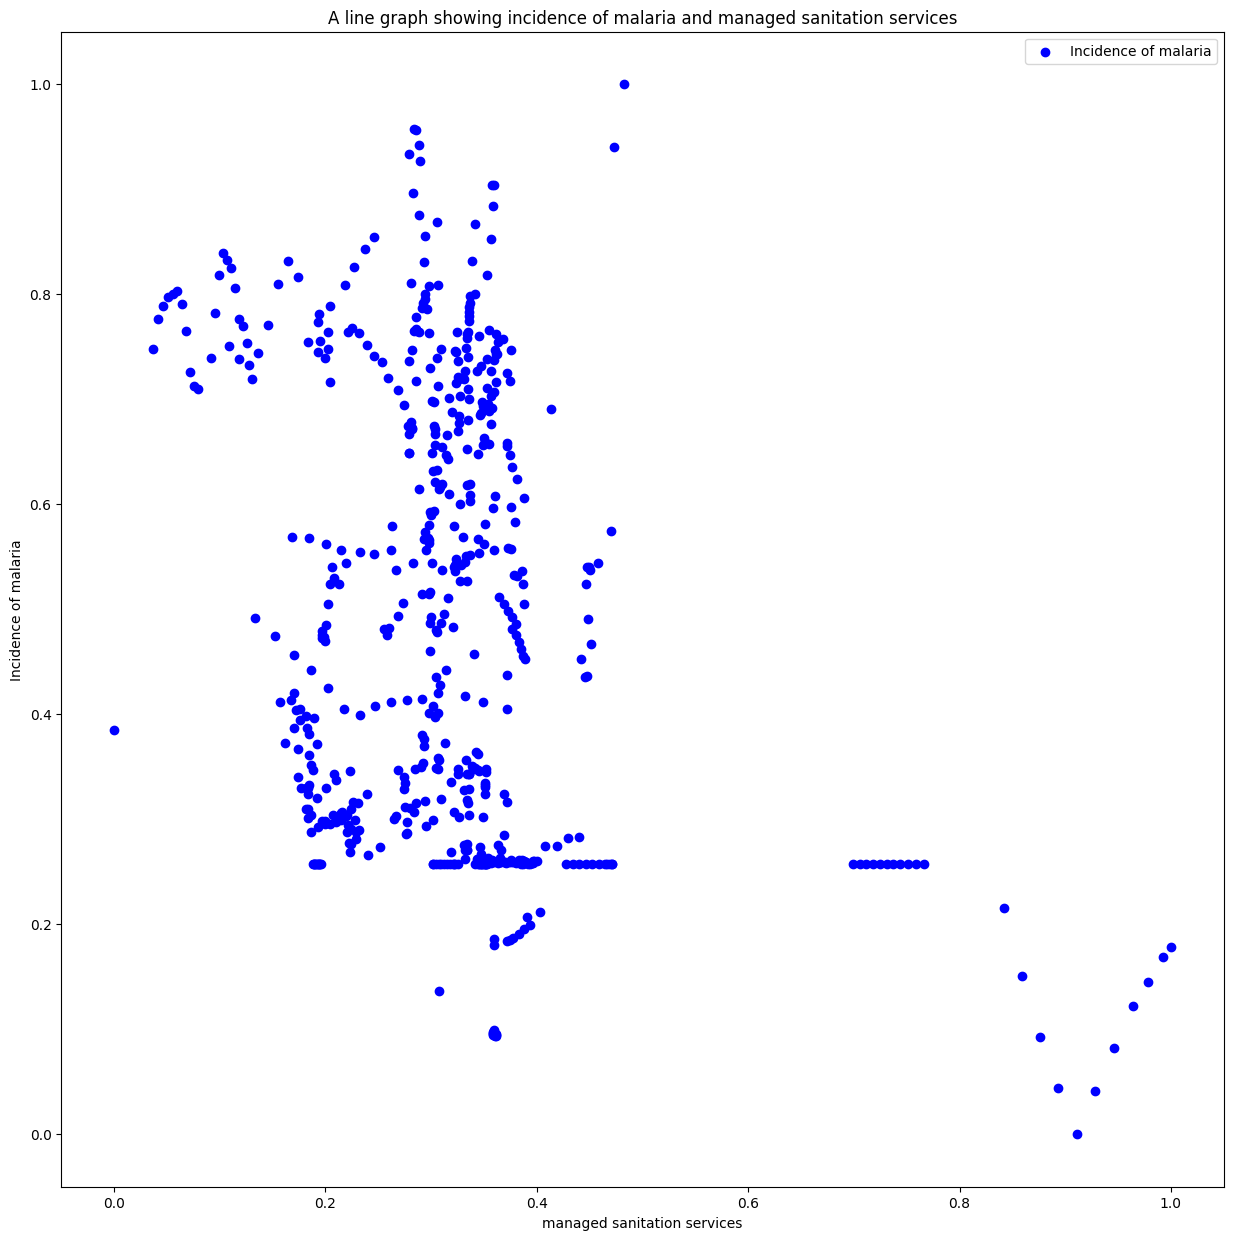

In [19]:
# Group the data by country and calculate the average incidence of malaria cases
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.scatter(df["managed sanitation services"].values,df["Incidence of malaria"].values, color='b', label='Incidence of malaria')
plt.legend()
plt.title(f"A line graph showing incidence of malaria and managed sanitation services")
plt.xlabel("managed sanitation services")
plt.ylabel("Incidence of malaria")
plt.show()

In [ ]:
# Group the data by country and calculate the average incidence of malaria cases
average_incidence_by_country = df.groupby("Country Name")
for name, group in average_incidence_by_country:
    # Visualize the top countries with the highest incidence of malaria
    plt.figure(figsize=(12, 6))
    plt.plot(group["Year"].values, group["Incidence of malaria"].values, color='blue', label='Incidence of malaria')
    plt.xlabel('Years')
    plt.ylabel('Incidence of malaria')
    plt.title(f'Incidence of malaria in {name}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
# Group the data by year and calculate the average incidence of malaria cases
average_incidence_by_country = df.groupby("Year")

for name, group in average_incidence_by_country:
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    x = np.arange(len(group["Country Name"].values))
    w =0.4
    ax.bar(x-w, group["Incidence of malaria"], width=w, color='b', label='Incidence of malaria', align='center')
    ax.bar(x, group["managed sanitation services"], width=w, color='r', label='managed sanitation services',align='center')
    ax.set_xticks(np.arange(len(group["Country Name"].values)))
    ax.set_xticklabels(list(group["Country Name"].values))
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.title(f"A bar chart showing Incidence of malaria and managed sanitation services in the {name}.")
    plt.show()

# conclusion


With most countries in Africa, incidences of malaria increases as the years increase with an exception of Central African
Republic,Equqtorial Guinea,Ghana, Togo and Zambia where the incidences reduce and Egypt where the incidences of malaria remain constant

There is no correlation between incidence of malaria and managed sanitation services

In [ ]:
df[["Incidence of malaria", "managed sanitation services"]].corr()

### How the use of insect treated bed nets affects the malaria cases reported 

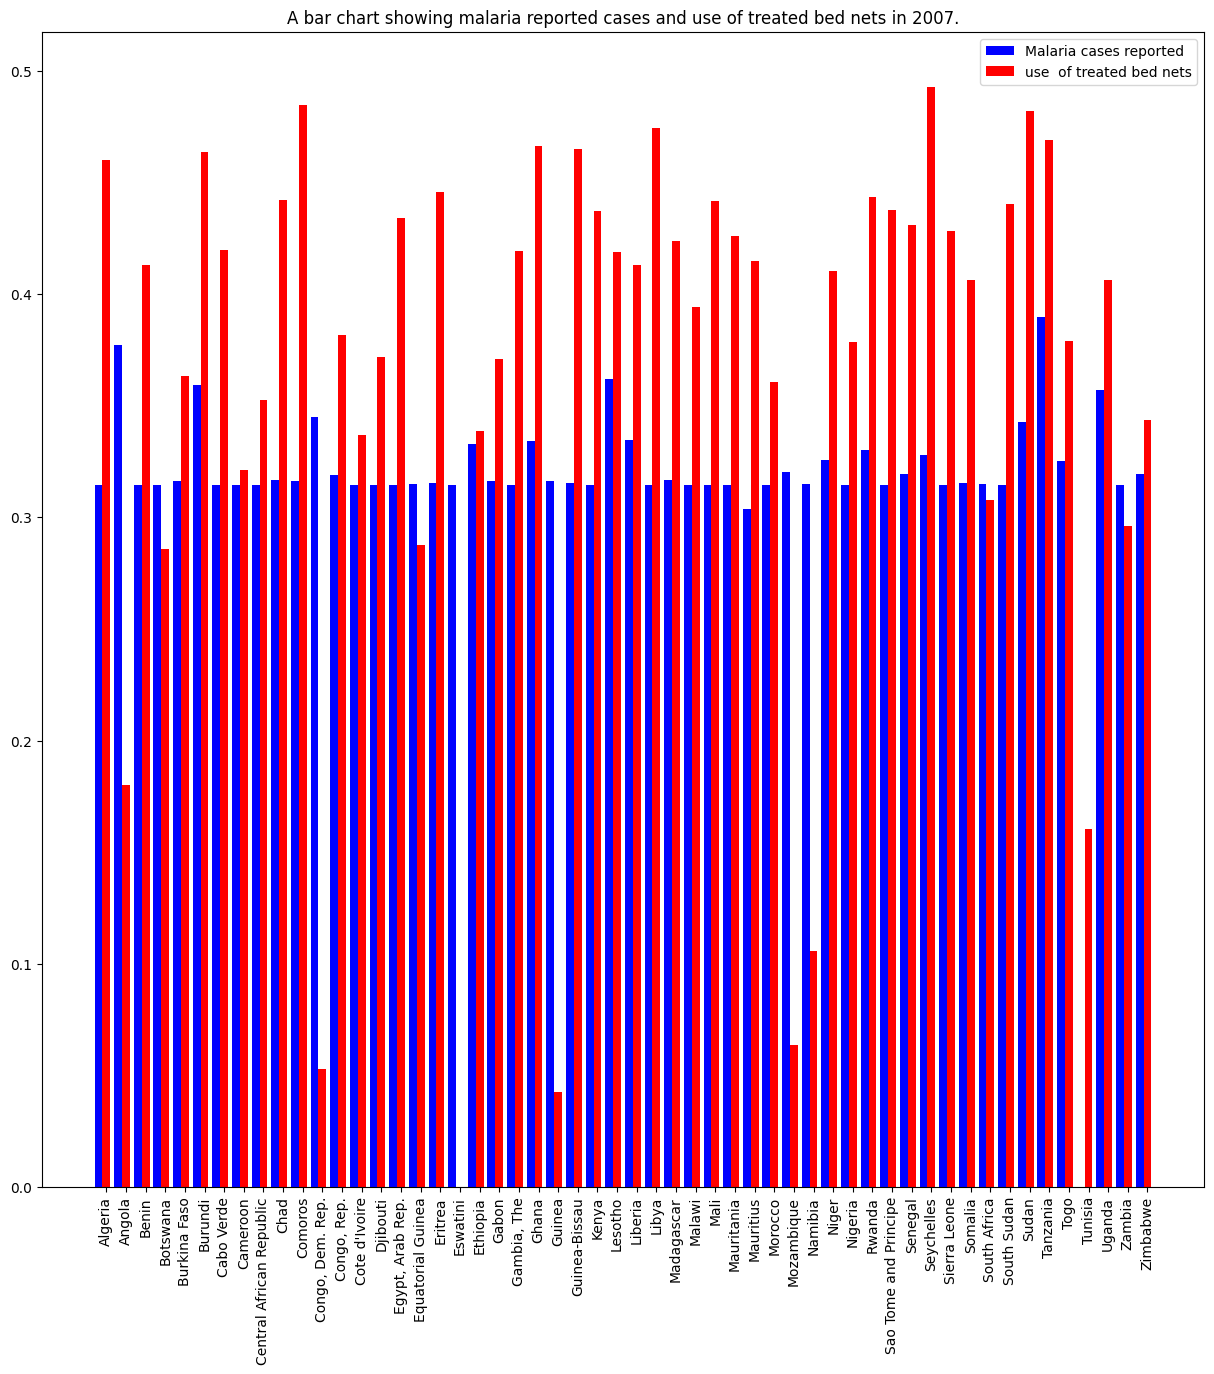

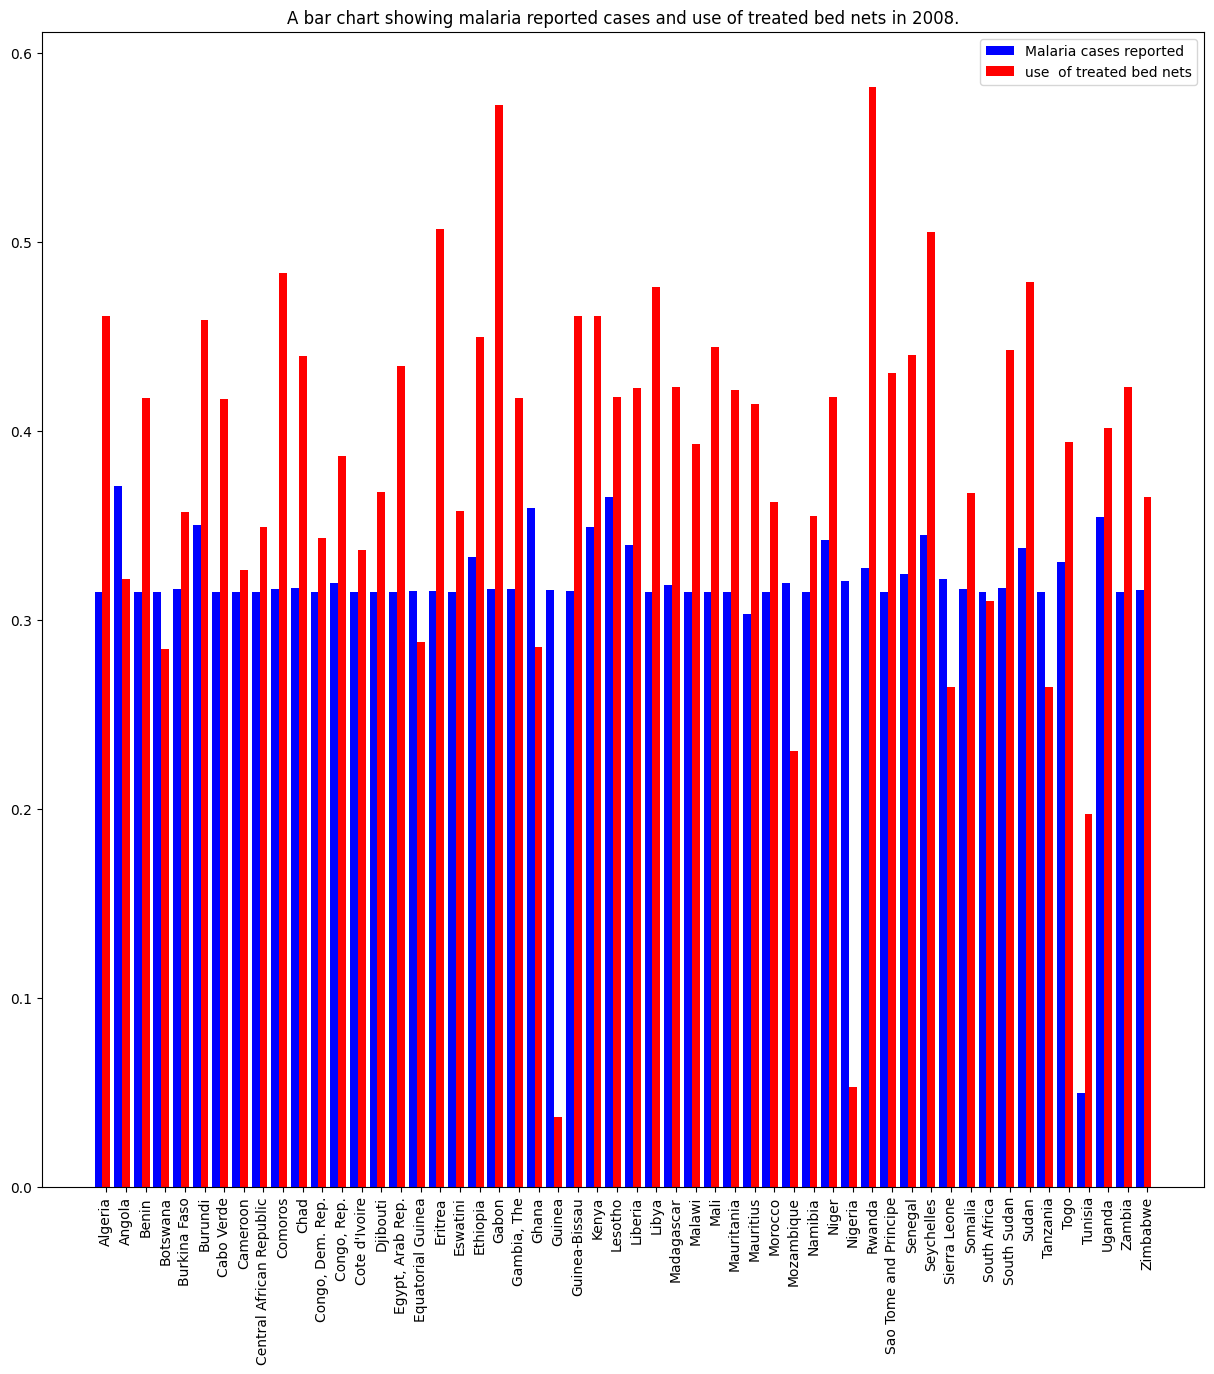

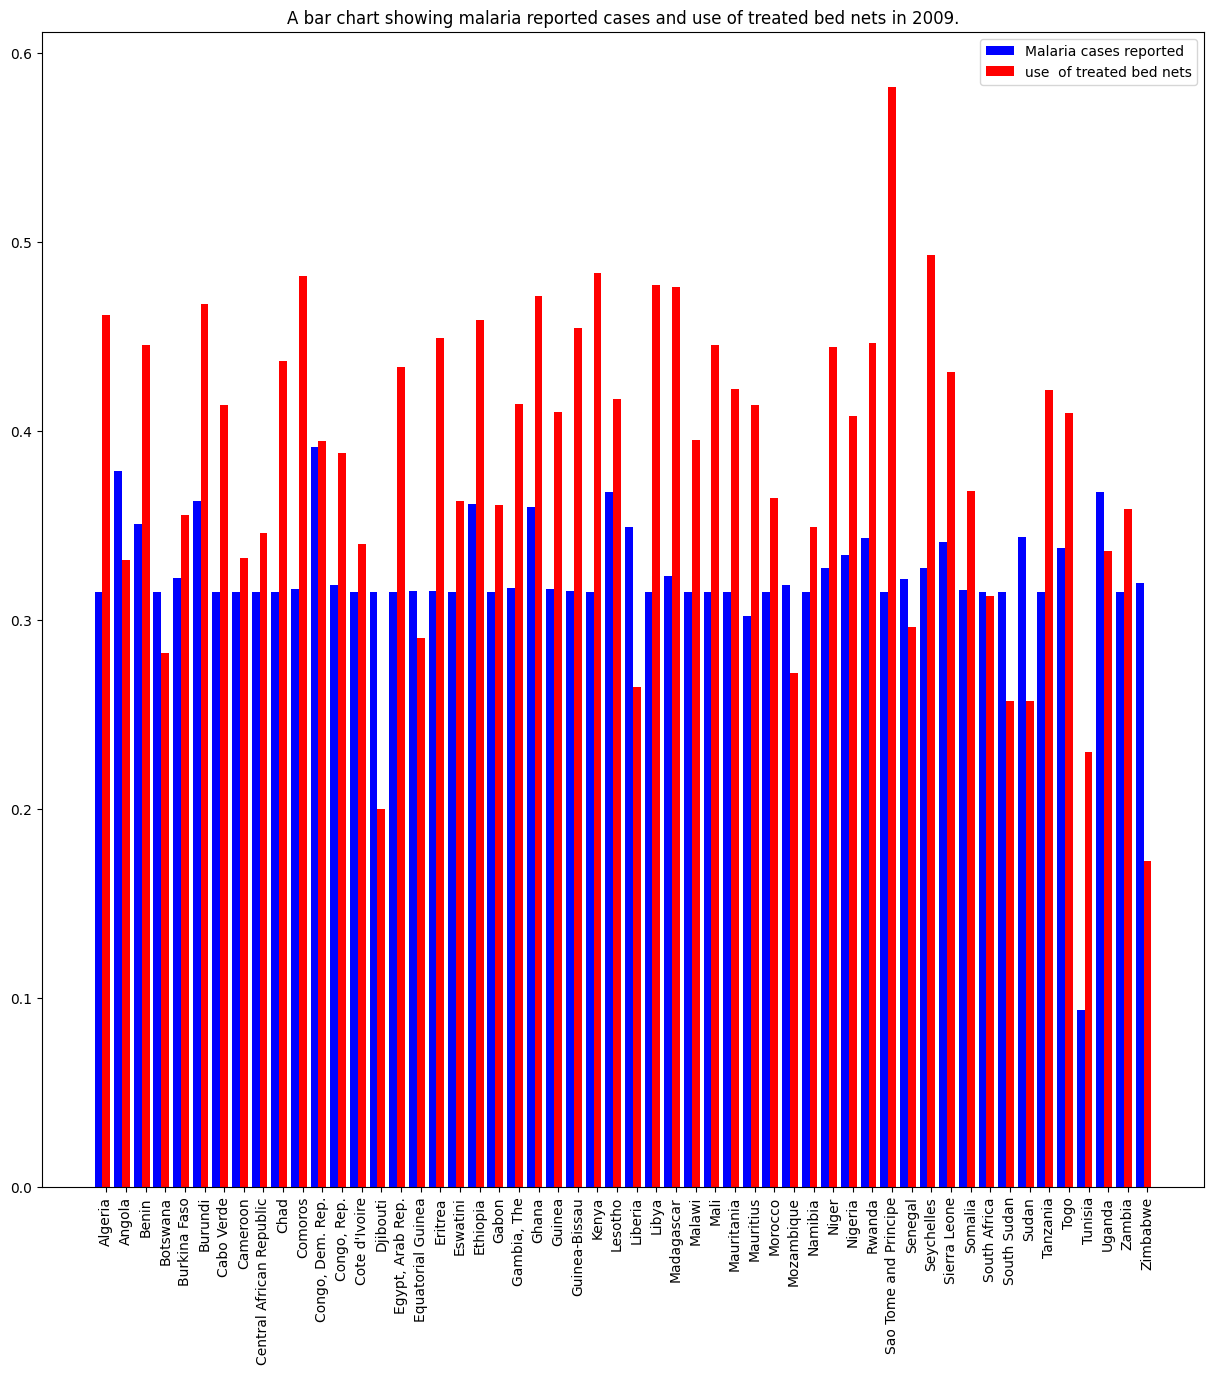

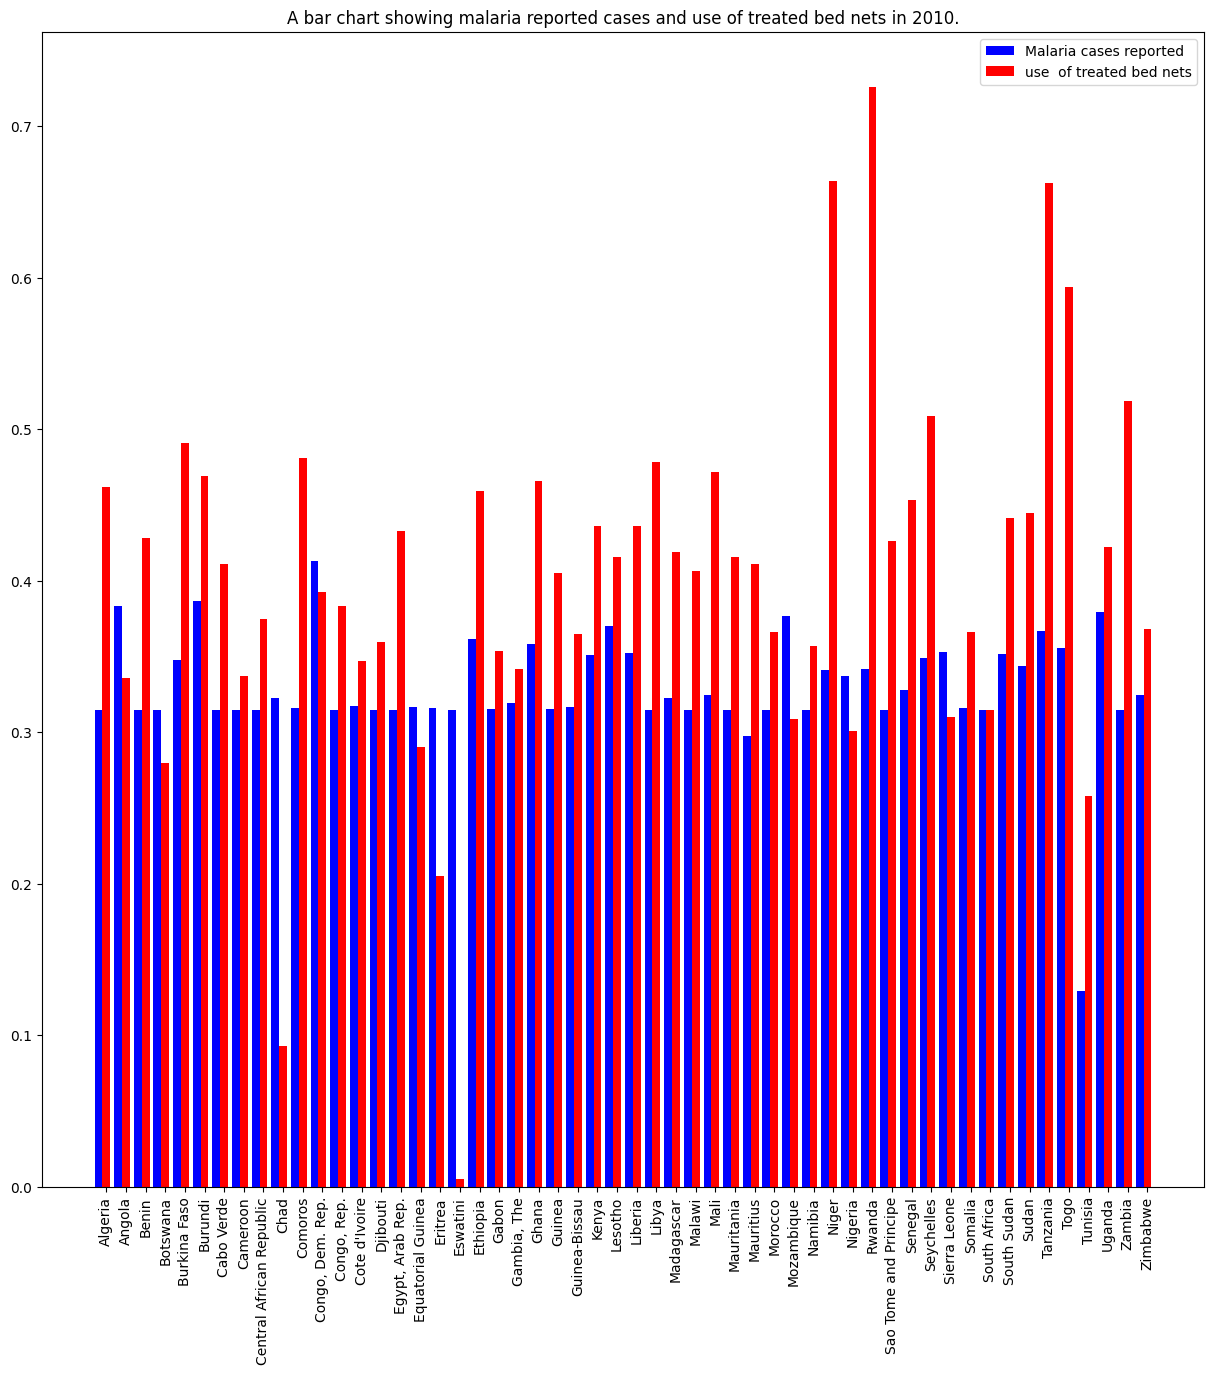

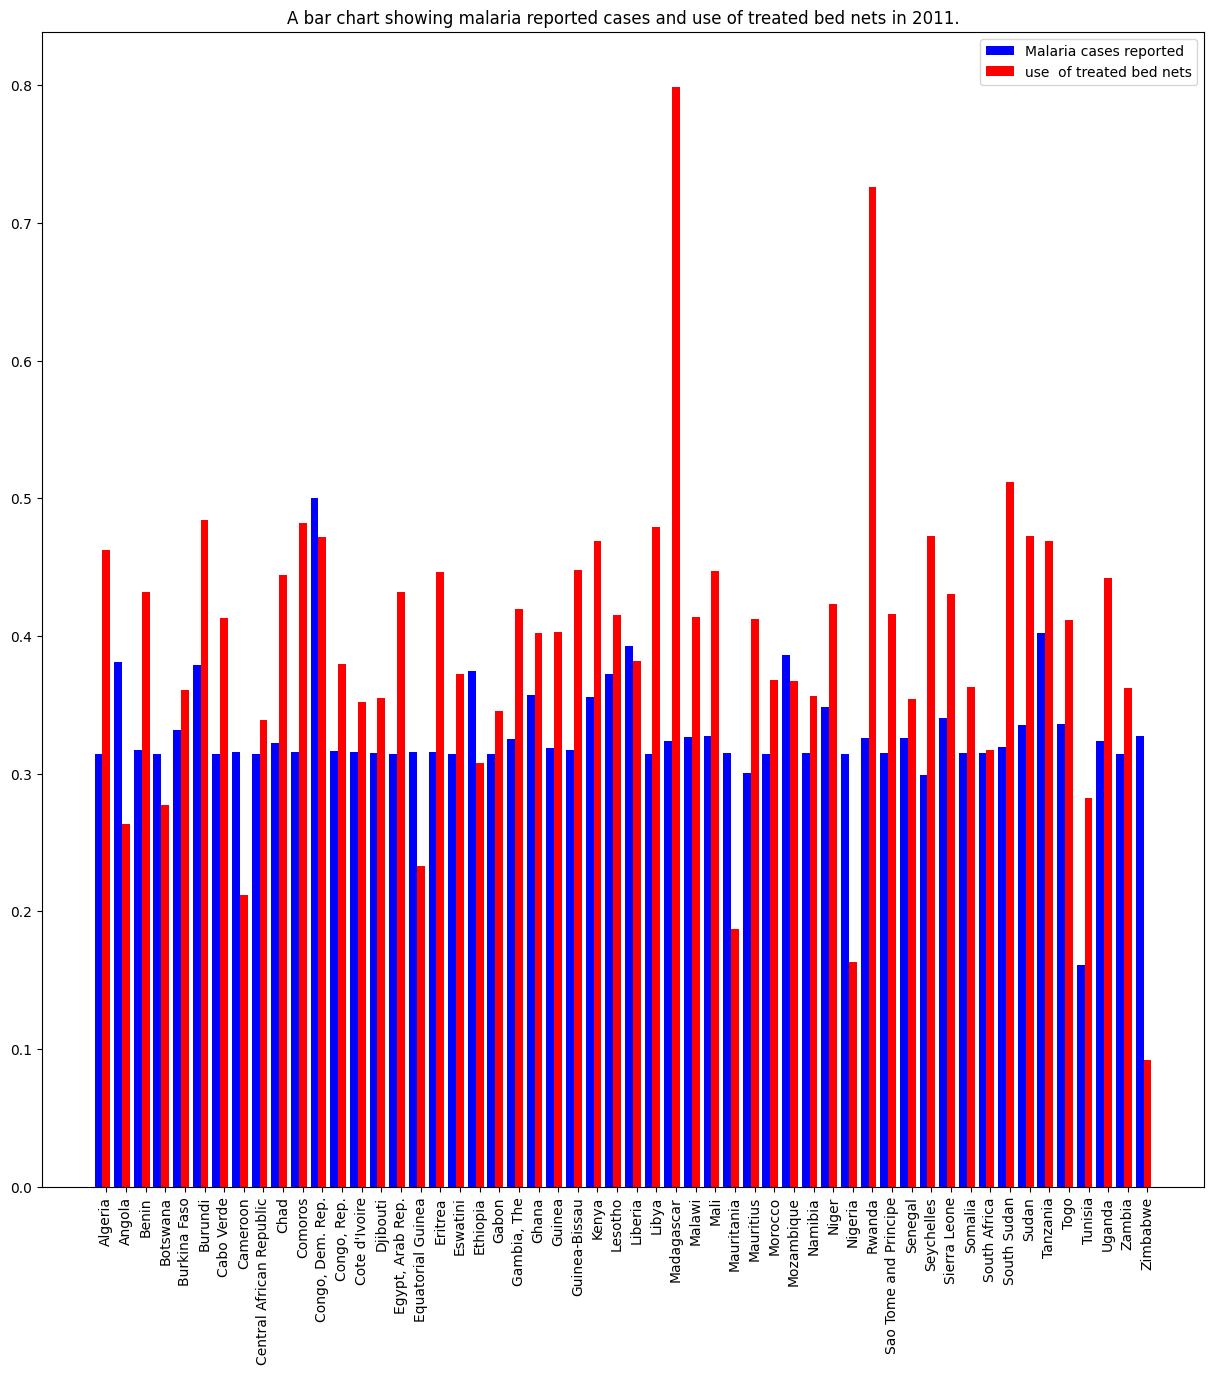

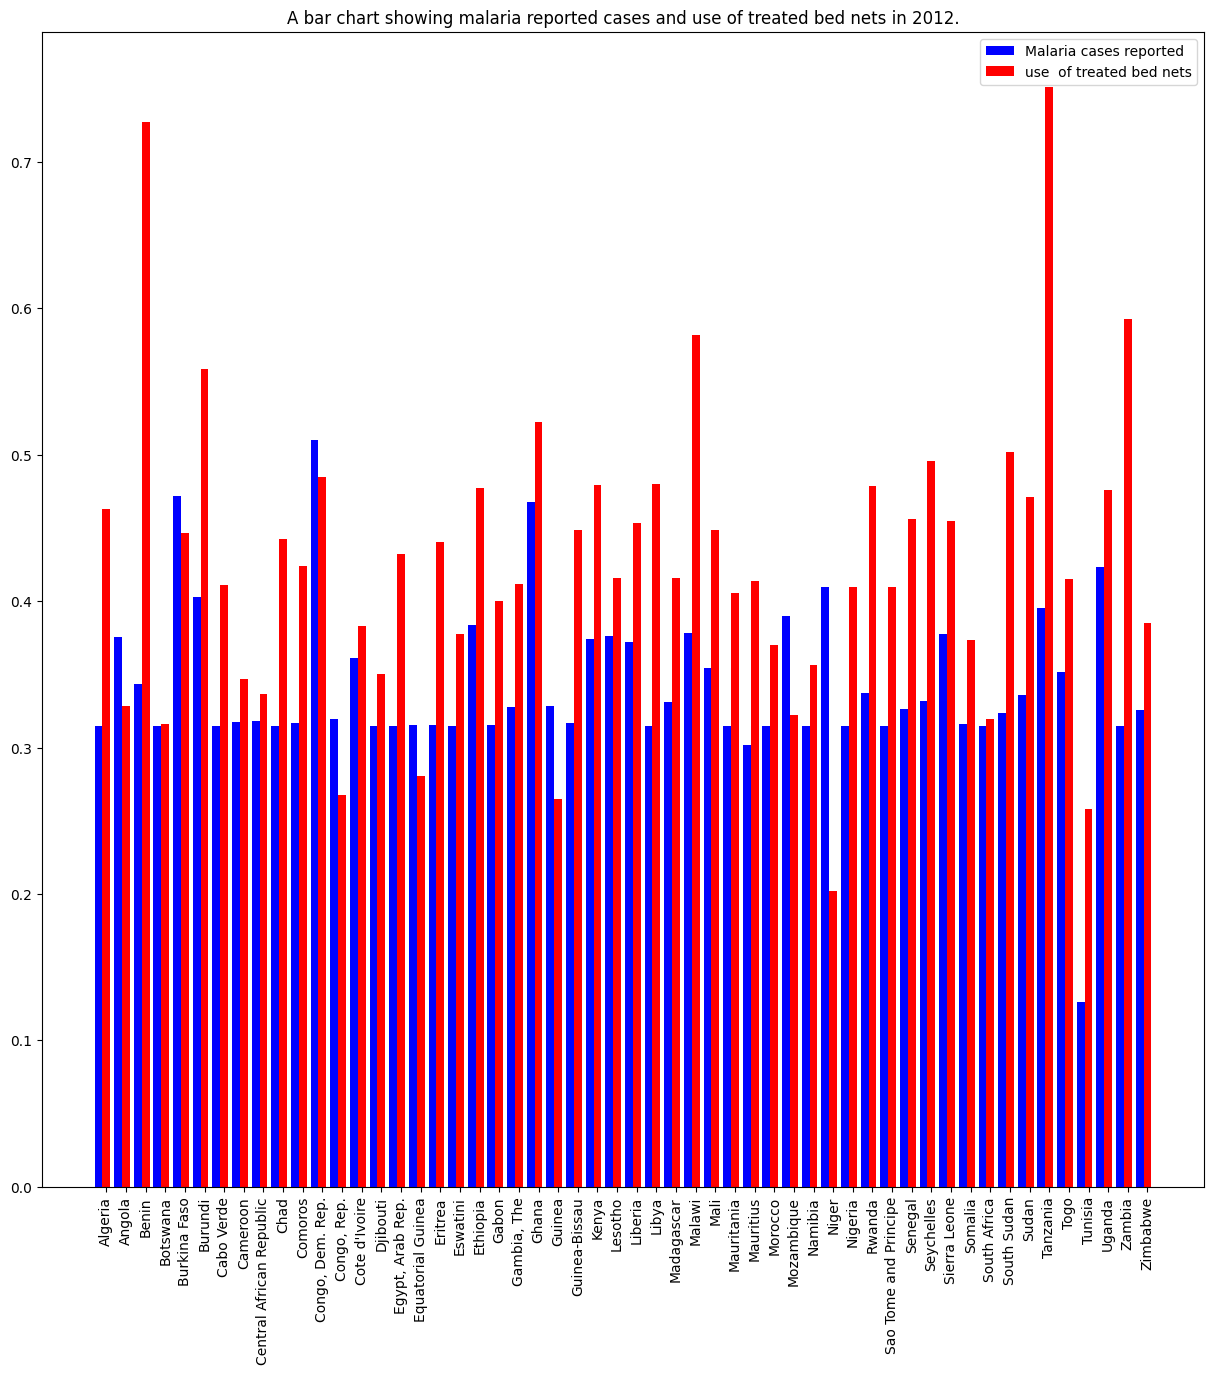

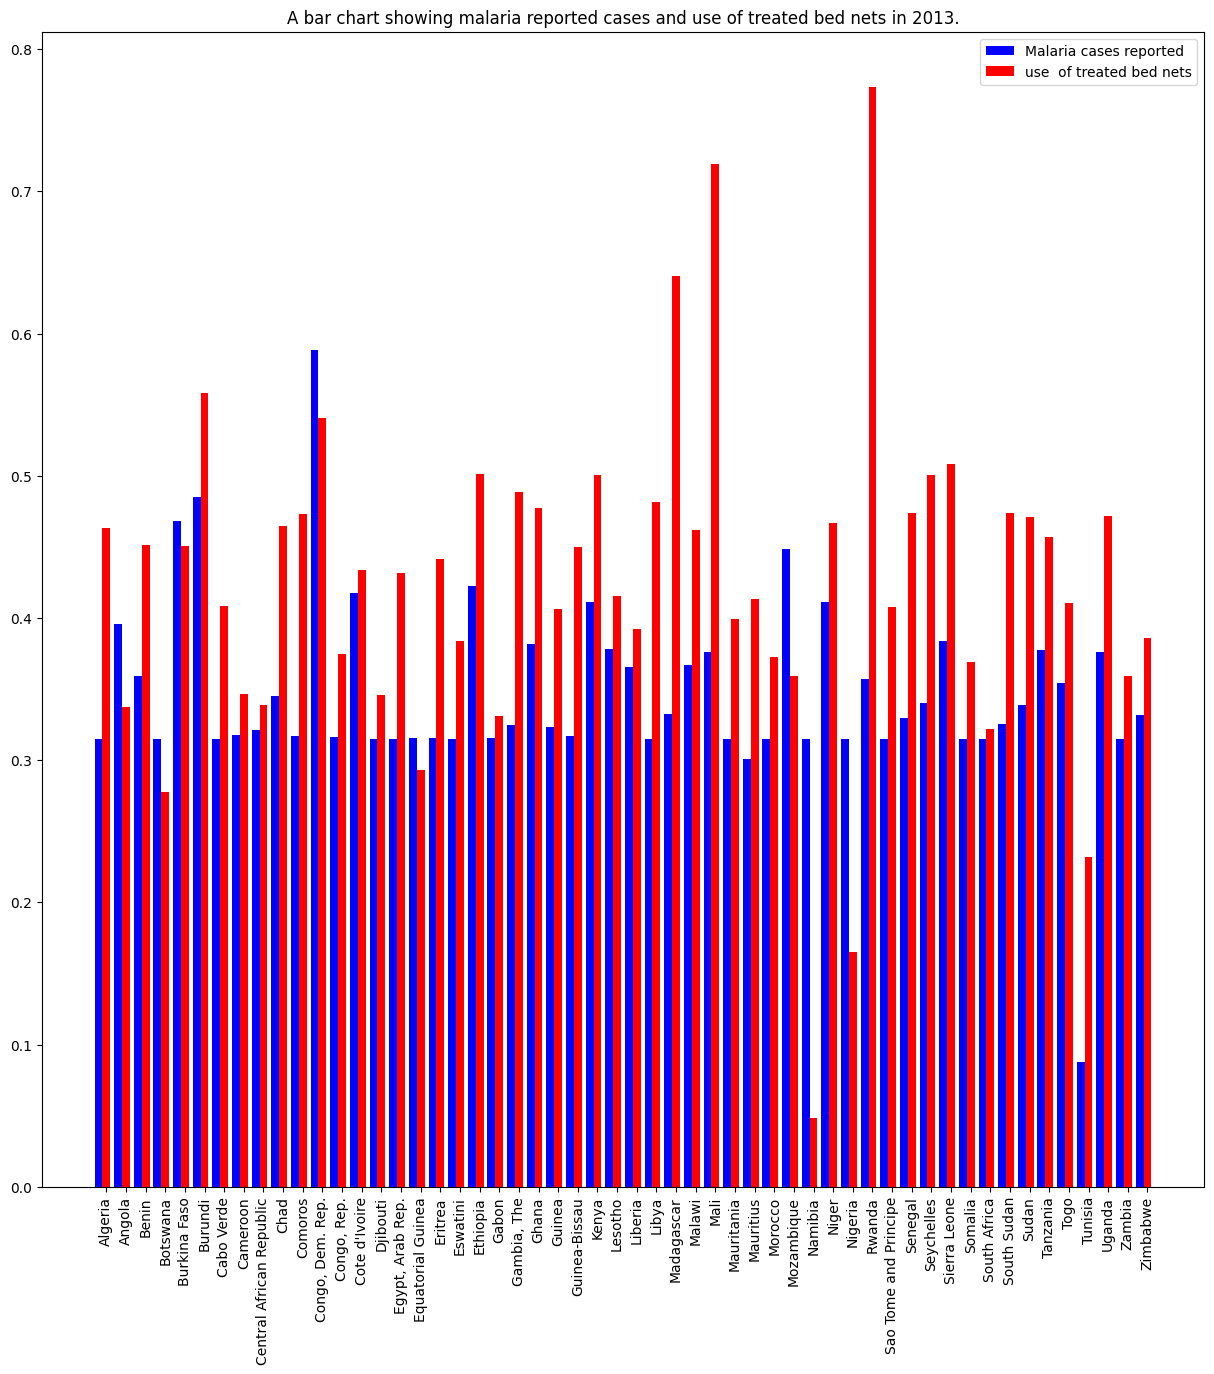

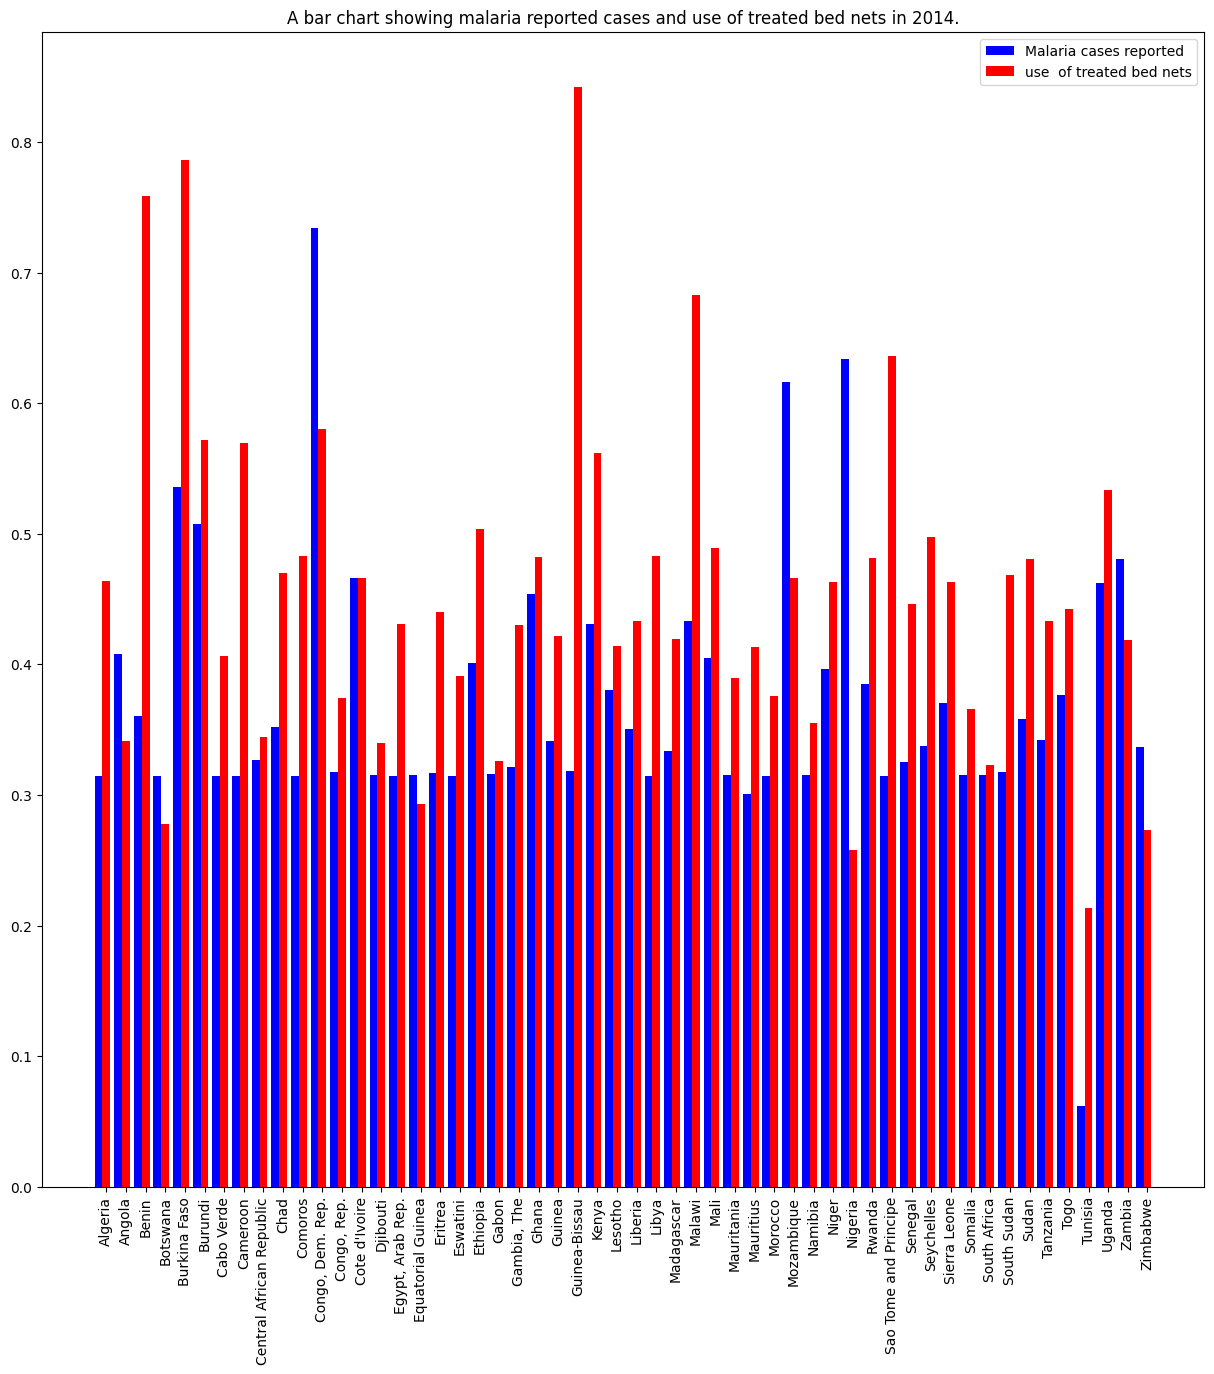

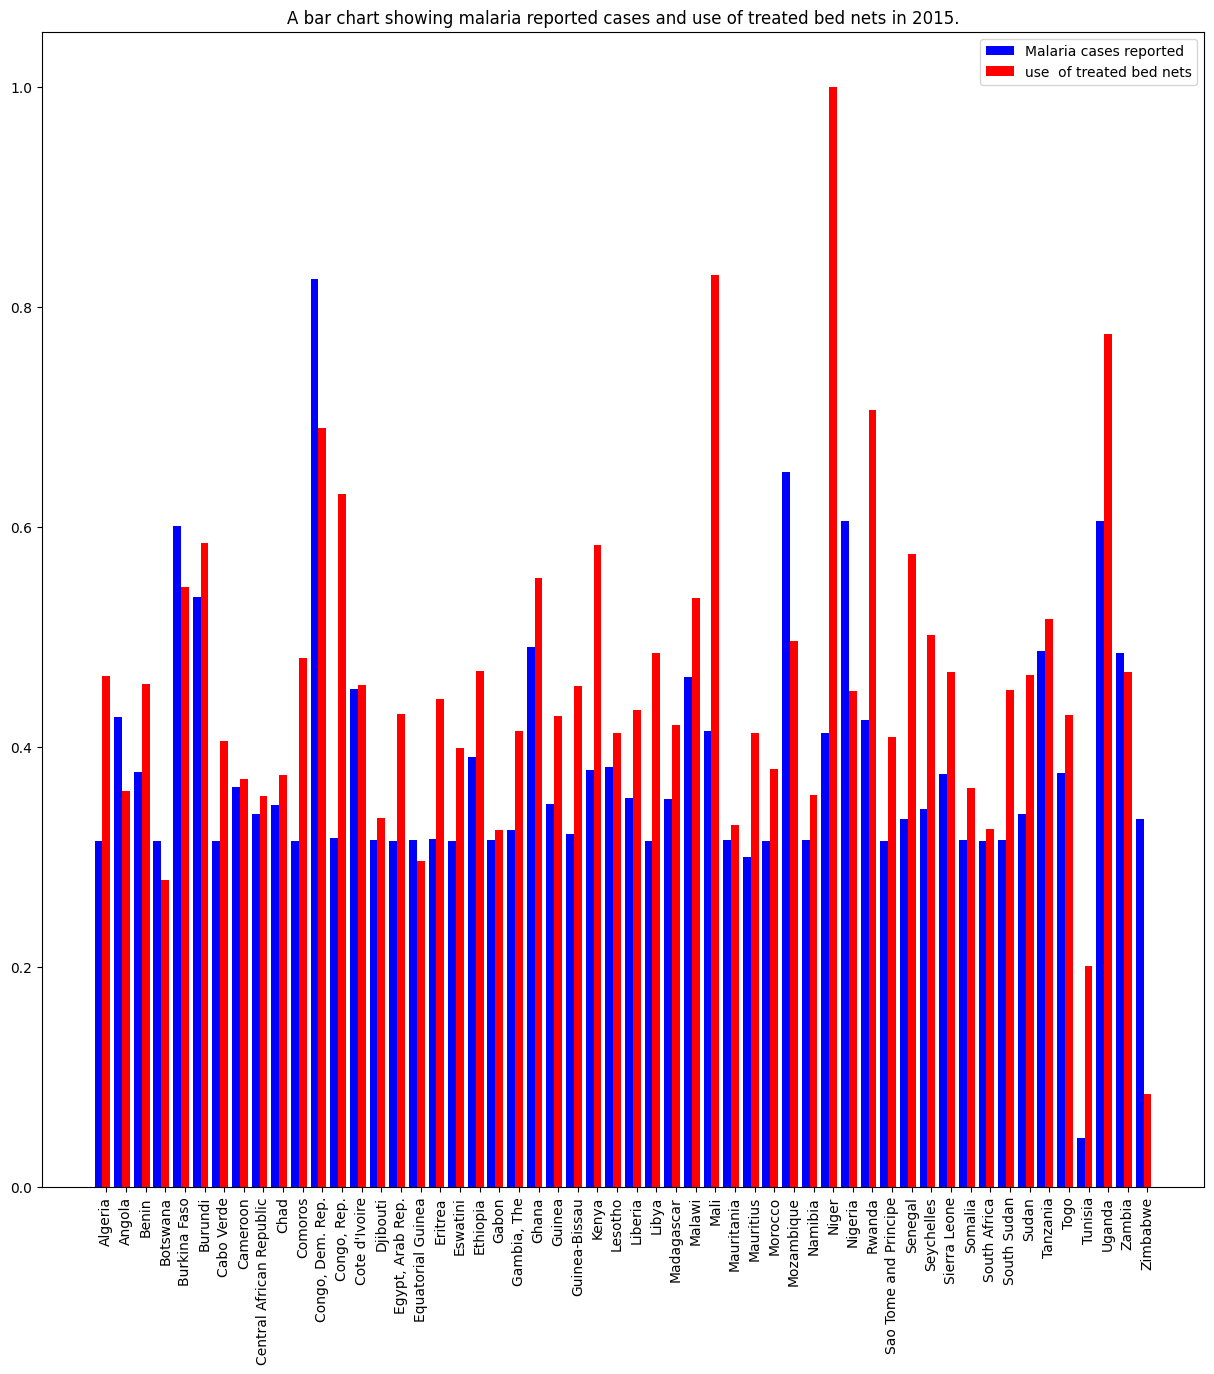

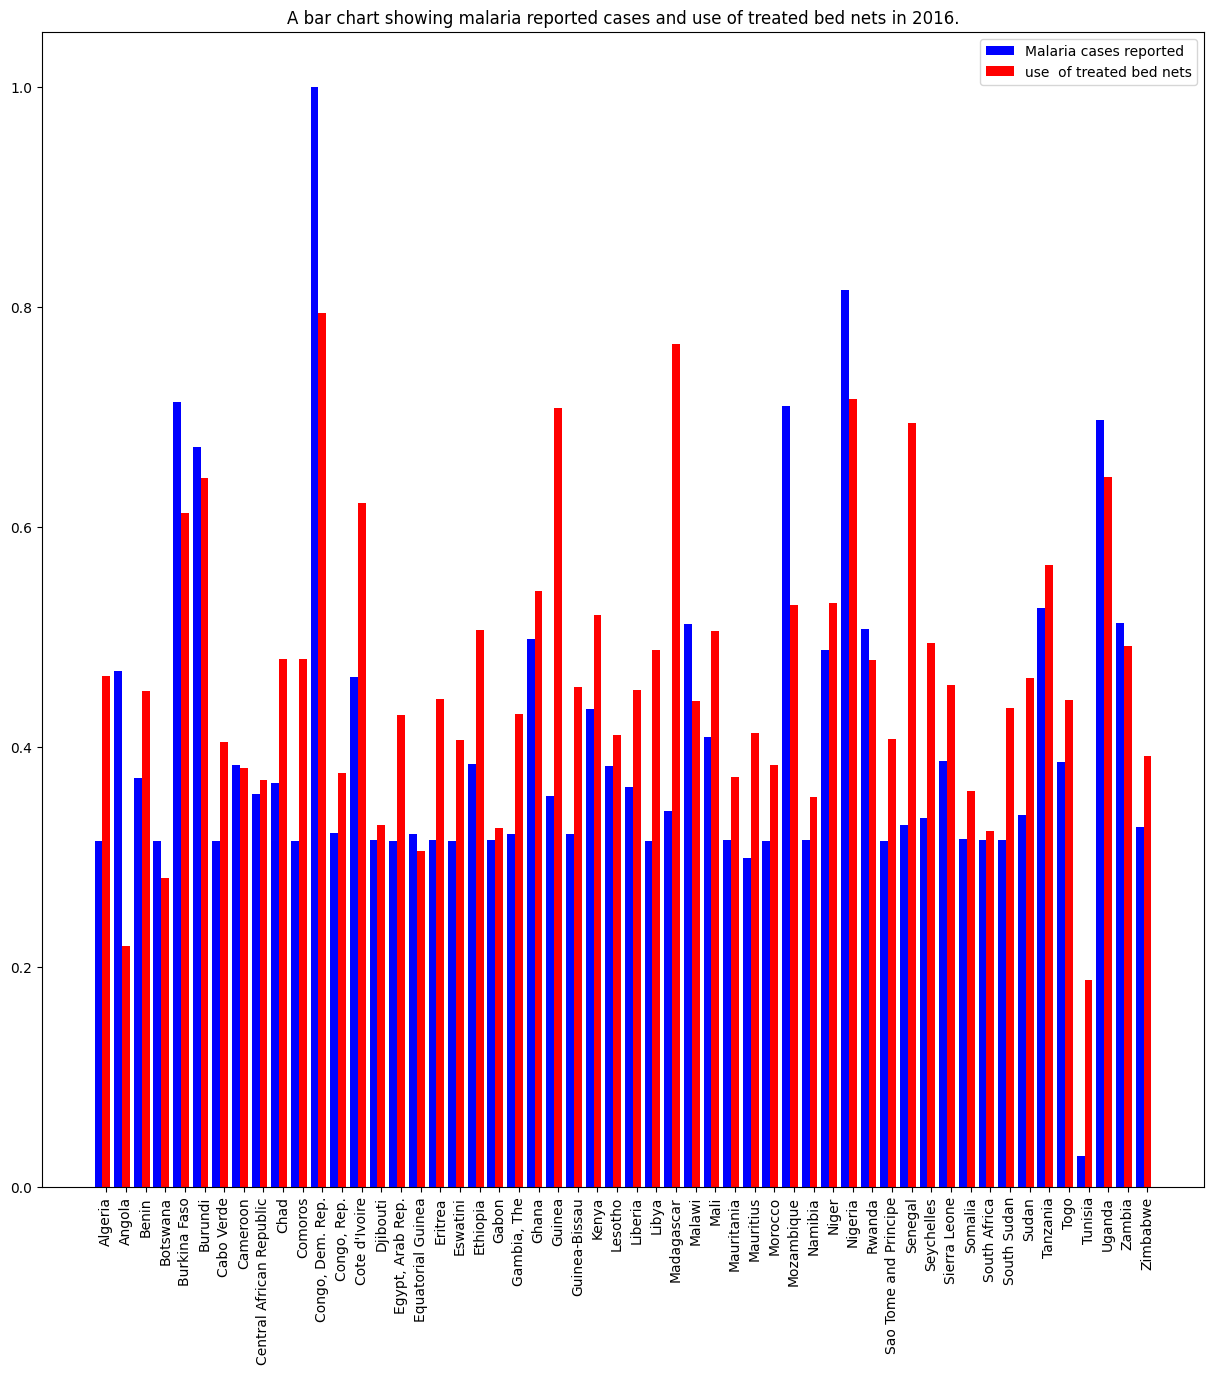

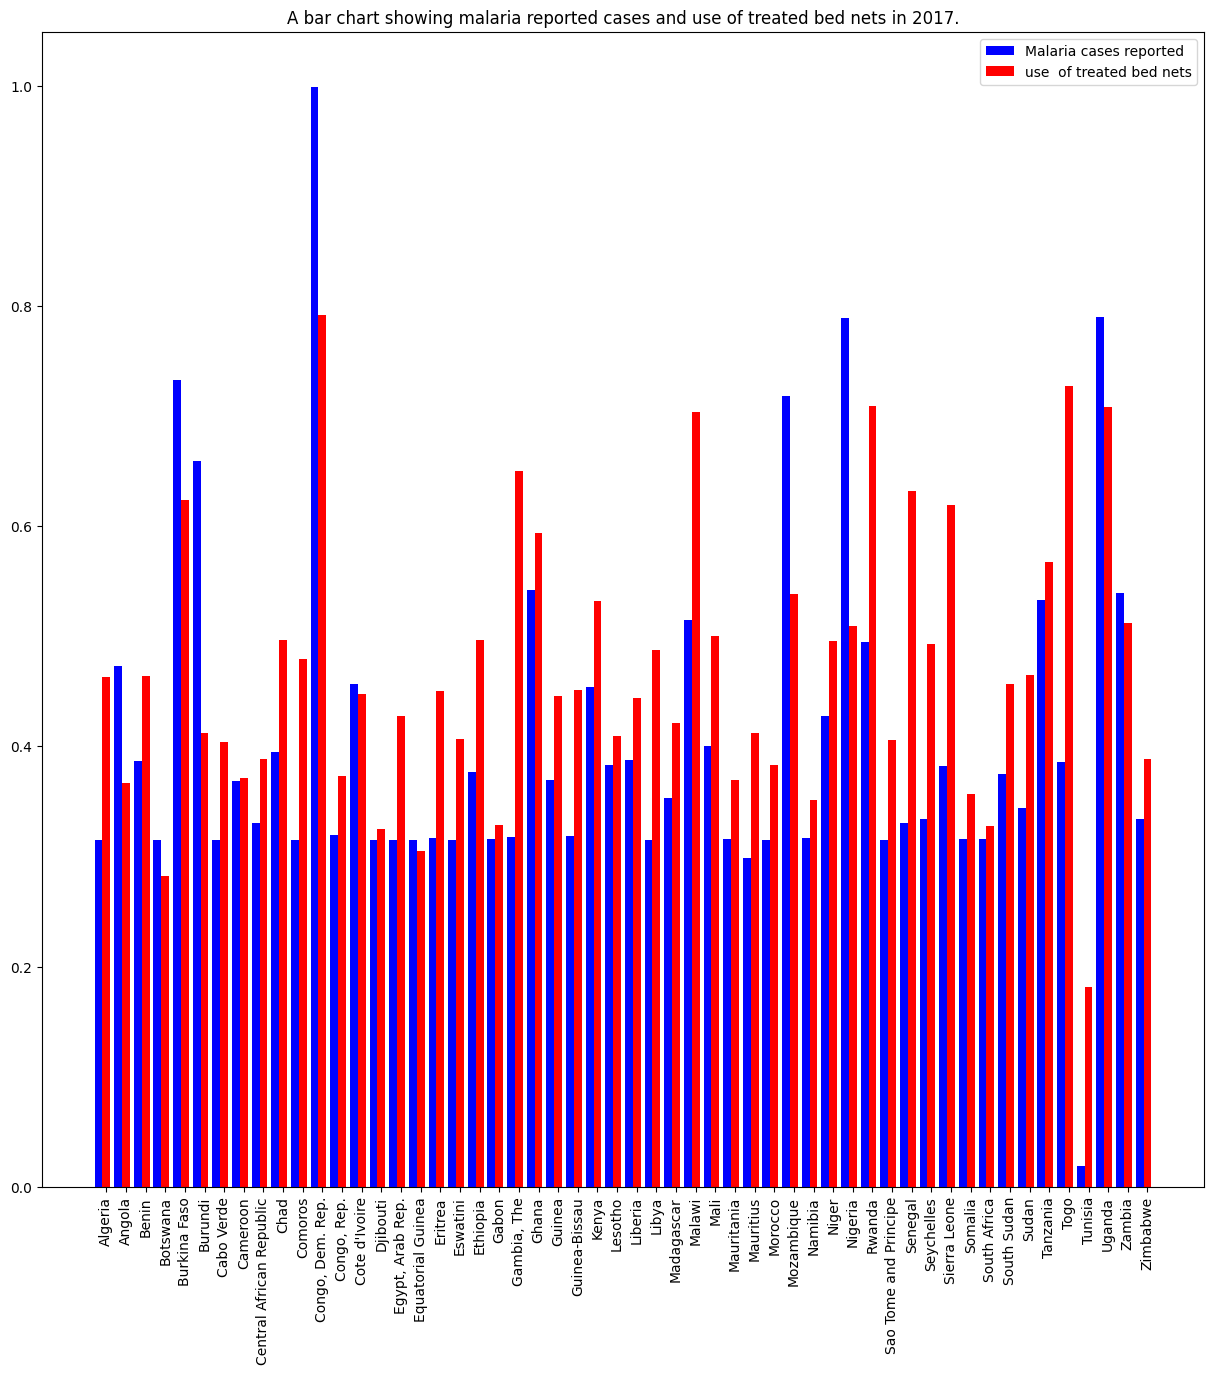

In [77]:
# NAGABA BLESSING 21/U/05218/PS 
# trends per Year 
# using a bar plot groupby year and see the effect of use of bed nets

average_incidence_by_country = df.groupby("Year")

for name, group in average_incidence_by_country:
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    x = np.arange(len(group["Country Name"].values))
    w =0.4
    ax.bar(x-w, group["Malaria cases reported"], width=w, color='b', label='Malaria cases reported', align='center')
    ax.bar(x, group["insecticide-treated bed nets"], width=w, color='r', label='use  of treated bed nets',align='center')
    ax.set_xticks(np.arange(len(group["Country Name"].values)))
    ax.set_xticklabels(list(group["Country Name"].values))
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.title(f"A bar chart showing malaria reported cases and use of treated bed nets in {name}.")
    plt.show()
 

# over the years most of the countries rate of use of bed nets was higher than the malaria cases reported meaning that  the higher the use of bed nets the less the cases reported  but as the years increased the malaria cases increased for some countries due to other  factors

In [22]:
# get the correlation 
correlation = df['insecticide-treated bed nets'].corr(df['Malaria cases reported'])
print(f"Correlation coefficient: {correlation}")



Correlation coefficient: 0.47145775429418774


In [51]:
correlation = df['Children with fever receiving antimalarial drugs'].corr(df['Malaria cases reported'])
print(f"Correlation coefficient: {correlation}")


Correlation coefficient: 0.47682554862134674


###     Predict incidence of malaria using the column of use of basic drinking water services

In [62]:


correlation = df['basic drinking water services'].corr(df['Incidence of malaria'])
print(f"Correlation coefficient: {correlation}")


Correlation coefficient: -0.5074011476099337


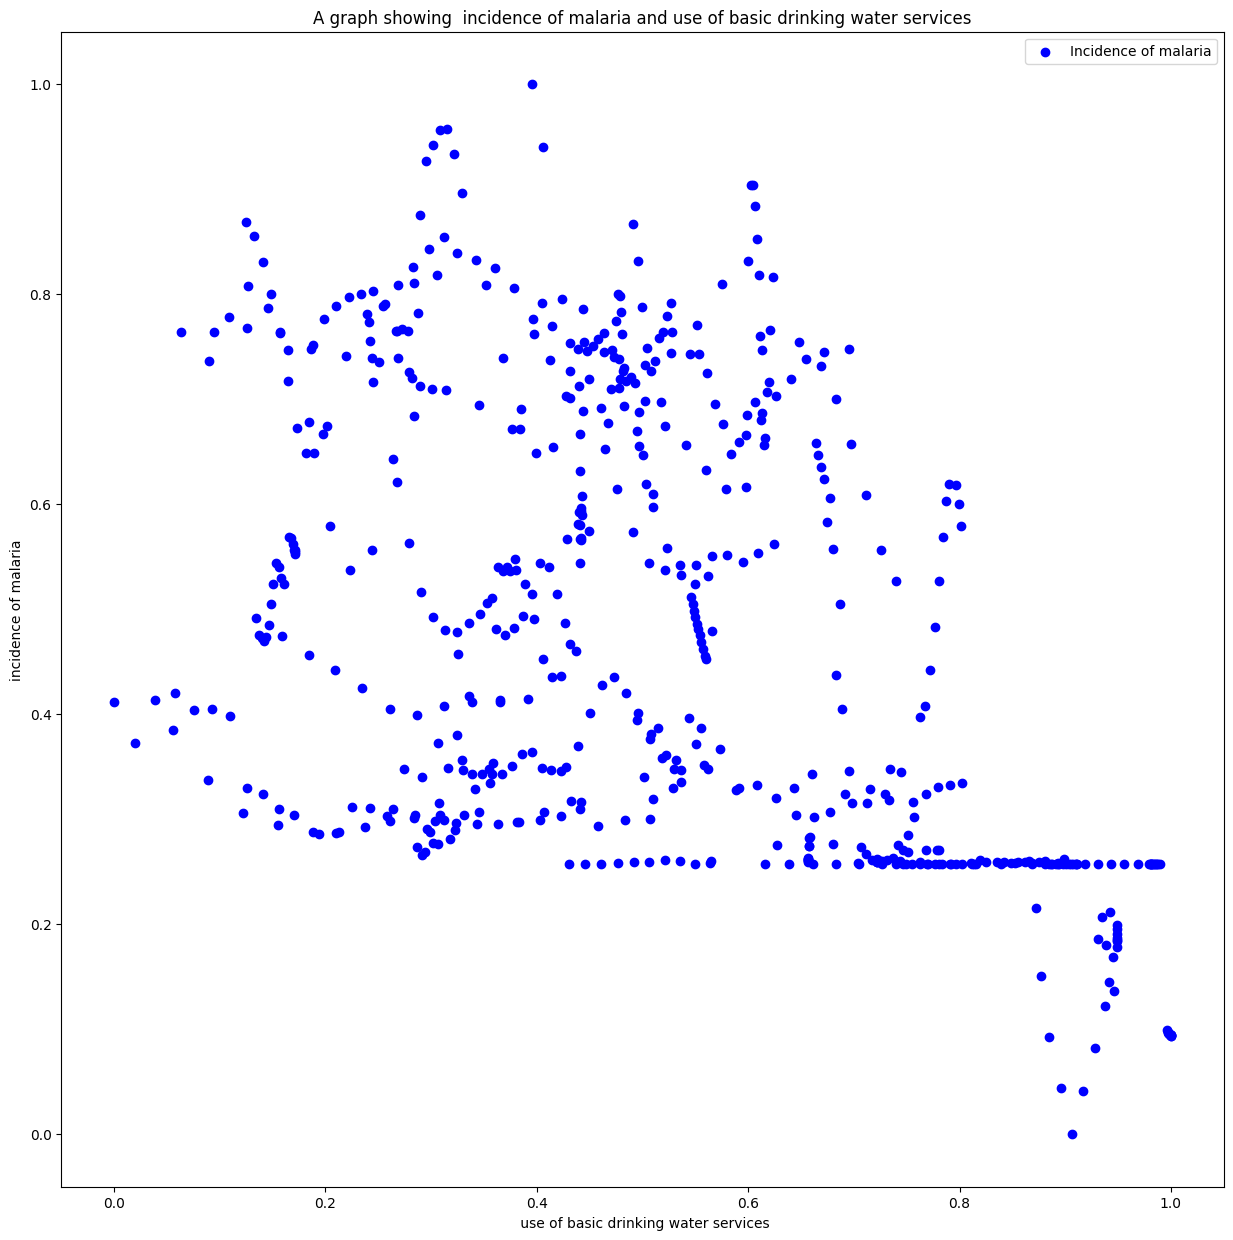

In [63]:

# scatter plot

fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.scatter(df["basic drinking water services"].values,df["Incidence of malaria"].values, color='b', label='Incidence of malaria')
plt.legend()
plt.title(f"A graph showing  incidence of malaria and use of basic drinking water services")
plt.xlabel(" use of basic drinking water services")
plt.ylabel("incidence of malaria")
plt.show()

In [76]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




# Separate features (X) and target variable (y)
X = df[['basic drinking water services']]  
Y = df['Incidence of malaria']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# use logistic reg
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error 
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

# A smaller MSE indicates that the model's predictions are closer to the actual values, suggesting a better fit. 
# hence less prediction errors .
    


Mean Squared Error: 0.03632767944190513


In [40]:
#NAMULI SYLVIA 21/U/12848/PS
#OBJECTIVE:HOW POPULATION GROWTH AFFECTS INCIDENCE OF MALARIA IN DIFFERENT AFRICA
# Group the data by country and calculate the average incidence of malaria cases


import pandas as pd


# Create a new column 'Population Annual Growth'
df['Population annual growth'] = 0
""""
The population annual growth is simply the average of urban population growth and rural population growth
We used the average because our dataframe is cleaned and has been normalised
"""    
df['Population annual growth'] = (df['Rural population growth'] + df['urban population growth']) / 2
df


,Country Name,Year,Country Code,geometry,latitude,longitude,Incidence of malaria,Malaria cases reported,insecticide-treated bed nets,Children with fever receiving antimalarial drugs,...,Rural population growth,Urban population,urban population growth,basic drinking water services,basic drinking water services rural,basic drinking water services urban,basic sanitation services,basic sanitation services rural,basic sanitation services urban,Population annual growth
0,Algeria,2007,DZA,POINT (28.033886 1.659626),28.033886,1.659626,0.257181,0.314625,0.460139,0.125561,...,0.270398,0.701340,0.610788,0.884501,0.830877,0.892716,0.851068,0.648694,0.909823,0.440593
1,Angola,2007,AGO,POINT (-11.202692 17.873887),-11.202692,17.873887,0.620909,0.377105,0.179894,0.498011,...,0.508539,0.602376,0.801660,0.267945,0.081179,0.288458,0.339648,0.104673,0.488334,0.655099
2,Benin,2007,BEN,POINT (9.307689999999999 2.315834),9.307690,2.315834,0.866414,0.314624,0.412996,0.730678,...,0.516129,0.400657,0.725311,0.491045,0.457478,0.505740,0.071677,0.020744,0.114092,0.620720
3,Botswana,2007,BWA,POINT (-22.328474 24.684866),-22.328474,24.684866,0.258475,0.314640,0.285913,0.166698,...,0.190702,0.607558,0.784232,0.704132,0.489853,0.883740,0.595832,0.329317,0.755016,0.487467
4,Burkina Faso,2007,BFA,POINT (12.238333 -1.561593),12.238333,-1.561593,0.896302,0.316427,0.363303,0.677533,...,0.532258,0.166077,0.876349,0.328727,0.339212,0.503861,0.111672,0.038809,0.395590,0.704303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,POINT (8.619543 0.824782),8.619543,0.824782,0.610100,0.386155,0.726984,0.511866,...,0.477230,0.395602,0.700415,0.510083,0.378594,0.773325,0.117251,0.047626,0.187004,0.588822
590,Tunisia,2017,TUN,POINT (33.886917 9.537499),33.886917,9.537499,0.177941,0.019156,0.181025,0.025846,...,0.346300,0.742922,0.516183,0.948949,0.865668,0.995408,0.904431,0.686812,0.964886,0.431241
591,Uganda,2017,UGA,POINT (1.373333 32.290275),1.373333,32.290275,0.684391,0.790029,0.707984,0.799068,...,0.612903,0.168605,0.904564,0.284022,0.292341,0.482154,0.141880,0.123429,0.157839,0.758734
592,Zambia,2017,ZMB,POINT (-13.133897 27.849332),-13.133897,27.849332,0.460212,0.538951,0.512294,0.524498,...,0.518027,0.418605,0.735270,0.437174,0.300797,0.664788,0.225029,0.147285,0.276015,0.626648


In [ ]:
df.columns

In [44]:
# List the columns to be used for the objective
desired_columns = ['Country Name', 'Year', 'Incidence of malaria', 'Malaria cases reported', 'Population annual growth'] 
# Create a new DataFrame with only the desired columns
df1 = df[desired_columns]
df1

,Country Name,Year,Incidence of malaria,Malaria cases reported,Population annual growth
0,Algeria,2007,0.257181,0.314625,0.440593
1,Angola,2007,0.620909,0.377105,0.655099
2,Benin,2007,0.866414,0.314624,0.620720
3,Botswana,2007,0.258475,0.314640,0.487467
4,Burkina Faso,2007,0.896302,0.316427,0.704303
...,...,...,...,...,...
589,Togo,2017,0.610100,0.386155,0.588822
590,Tunisia,2017,0.177941,0.019156,0.431241
591,Uganda,2017,0.684391,0.790029,0.758734
592,Zambia,2017,0.460212,0.538951,0.626648


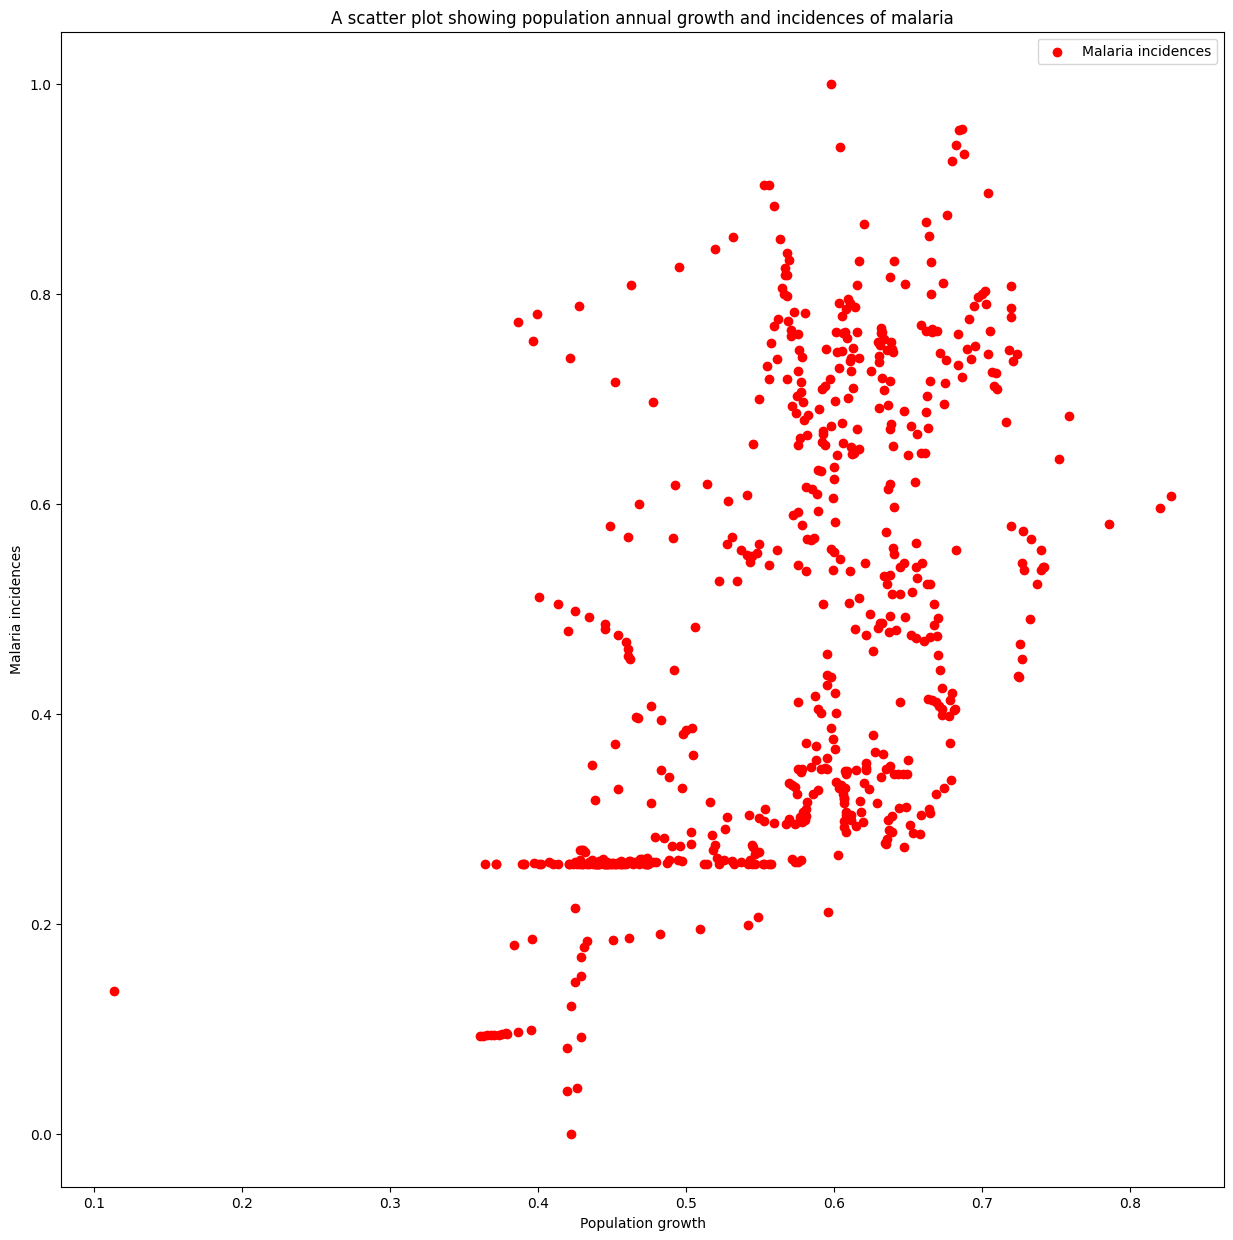

In [41]:
#Visualisation
#Illustrating scatter plot

fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.scatter(df["Population annual growth"].values,df["Incidence of malaria"].values, color='r', label='Malaria incidences')
plt.legend()
plt.title(f"A scatter plot showing population annual growth and incidences of malaria")
plt.xlabel("Population growth")
plt.ylabel("Malaria incidences")
plt.show()

In [ ]:
# Group the data by country and calculate the average incidence of malaria cases
average_incidence_by_country = df.groupby("Country Name")
for name, group in average_incidence_by_country:
    # Visualize the top countries with the highest average incidence and their corresponding number of malaria cases
    plt.figure(figsize=(12, 6))
    plt.plot(group["Population annual growth"].values, group["Incidence of malaria"].values, color='green', label='Malaria incidences')
    plt.xlabel('population growth rate')
    plt.ylabel('Malaria incidences')
    plt.title(f'Malaria incidences accoding to the population growth in {name}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [45]:
#checked for the correlation between Incidence of malaria and population annual growth
import pandas as pd
correlation = df1['Population annual growth'].corr(df1['Incidence of malaria'])

print("Correlation between Malaria cases reported and Incidence of malaria:", correlation)
print("The correlation is positively fair meaning an incresase in the population affects the incidence of malaria positively.")

Correlation between Malaria cases reported and Incidence of malaria: 0.5424822820050706
The correlation is positively fair meaning an incresase in the population affects the incidence of malaria positively.


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score

# Create a dictionary to store the models and predictions for each country
models = {}
predictions = {}

# Loop through each unique country in the DataFrame
for country in df['Country Name'].unique():
    # Filter data for the current country
    country_data = df[df['Country Name'] == country]
    
    # Select the features (population annual growth) and target variable (incidence of malaria)
    X = country_data[['Population annual growth']]
    y = country_data['Incidence of malaria']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error (you can use other metrics as well)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the model and predictions for the current country
    models[country] = model
    predictions[country] = {
        'X_test': X_test,
        'y_test': y_test,
        'y_pred': y_pred,
        'mse': mse
    }


# Loop through each country and access the MSE value
for country, data in predictions.items():
    mse_value = data['mse']
    print(f"MSE for {country}: {mse_value}")

MSE for Algeria: 5.364712885085872e-10
MSE for Angola: 0.004618890975527056
MSE for Benin: 0.0026337421221152408
MSE for Botswana: 1.4389486583963972e-06
MSE for Burkina Faso: 0.014722091266517476
MSE for Burundi: 0.0016316184759949087
MSE for Cabo Verde: 1.771628089795111e-07
MSE for Cameroon: 0.003873132765204417
MSE for Central African Republic: 0.0020502905551211532
MSE for Chad: 0.0007051252258043592
MSE for Comoros: 0.00154953640224429
MSE for Congo, Dem. Rep.: 0.006634465085069801
MSE for Congo, Rep.: 0.0012367534027178946
MSE for Cote d'Ivoire: 0.0015290984830018874
MSE for Djibouti: 9.60411237701361e-05
MSE for Egypt, Arab Rep.: 0.0
MSE for Equatorial Guinea: 0.00278166138415922
MSE for Eritrea: 5.3445304009338185e-05
MSE for Eswatini: 3.331523927747349e-06
MSE for Ethiopia: 0.0130692150630983
MSE for Gabon: 0.006925224120659775
MSE for Gambia, The: 0.0013507946342280026
MSE for Ghana: 0.0044888299280471085
MSE for Guinea: 0.002062007267904759
MSE for Guinea-Bissau: 0.00053893

In [47]:
# Now, you have trained models for each country, and you can use them to make predictions for any year

# For example, let's predict the incidence of malaria for Uganda in 2017
uganda_population_growth_2017 = 0.758734
uganda_model = models['Uganda']
uganda_predicted_incidence = uganda_model.predict([[uganda_population_growth_2017]])

print("Predicted incidence of malaria for Uganda in 2017:", uganda_predicted_incidence[0])

Predicted incidence of malaria for Uganda in 2017: 0.6016660473629707


c:\Users\Blessing\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## CONCLUSION
Poplation annual growth affects the incidences of malaria in different countries and can be used to predict the incidence of malaria in a given year.    
